<a href="https://colab.research.google.com/github/pegahottawa/Exploratory-Data-Analysis-Projects/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries and Exploring the Dataset**

In [1]:
!jupyter nbconvert --to html /content/drive/MyDrive/HUMI/CustomerChurn.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/HUMI/CustomerChurn.ipynb to html
[NbConvertApp] Writing 1323763 bytes to /content/drive/MyDrive/HUMI/CustomerChurn.html


In [2]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install matplotlib==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score,f1_score, accuracy_score, classification_report,fbeta_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import model_selection
import statsmodels.api as st
from lifelines.statistics import multivariate_logrank_test   
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import plotly.express as px
import functools

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv("/content/drive/MyDrive/HUMI/data.csv")
df1 = pd.read_csv("/content/drive/MyDrive/HUMI/dataset1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/HUMI/dataset2.csv")
df3 = pd.read_csv("/content/drive/MyDrive/HUMI/dataset3.csv")
df4 = pd.read_csv("/content/drive/MyDrive/HUMI/dataset4.csv")
df5 = pd.read_csv("/content/drive/MyDrive/HUMI/dataset5.csv")

In [7]:
# Join tables
df_main = functools.reduce(functools.partial(pd.merge, how = 'outer'), 
                           [df,df1,df2,df3,df4,df5])
df_main.pop(df_main.columns[-1])
df_main.head()
#df_main.to_excel("converted-to-excel.xlsx")

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,customerID
0,No,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1
1,No,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,2
2,Yes,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,3
3,No,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,4
4,Yes,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,5


In [8]:
df_main.isnull().sum()

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
customerID          0
dtype: int64

In [9]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df_main.duplicated().sum()

0

In [11]:
# Drop rows that have tenure equal 0
# All the customers having tenure = 0 should have null or zero total charges which means that these customers recently joined but this is not the case in the dataset.
df_main[df_main["tenure"] == 0]
df_main.drop(labels=df_main[df_main["tenure"] == 0].index, axis = 0, inplace = True)
df_main

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,customerID
0,No,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1
1,No,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,2
2,Yes,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,3
3,No,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,4
4,Yes,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,7039
7039,No,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,7040
7040,No,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,7041
7041,Yes,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,7042


In [12]:
df_main.SeniorCitizen.unique()

array([0, 1])

In [13]:
# Replace 0 and 1 categories in SeniorCitizen column into "No" and "Yes" respectively 
df_main.SeniorCitizen = df_main.SeniorCitizen.map({0: "No", 1: "Yes"})
df_main.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,customerID
0,No,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1
1,No,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,2
2,Yes,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,3
3,No,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,4
4,Yes,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,5


In [14]:
# Remove customerID column 
#df_main.drop(["customerID"], inplace = True, axis = 1)

# **EDA Analysis**
**Gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines,   
 OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, 
 StreamingMovies, InternetService, Contract, PaperlessBilling, PaymentMethod**

In [15]:
def stacked_bar(df, group, target):
    """
    Generate a stacked plots
    """
    fig, ax = plt.subplots(figsize = (12,5))
    temp = (df.groupby([group, target]).size()/
            df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp.plot(kind='bar', stacked=True, ax = ax, color = ['green', 'red'])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

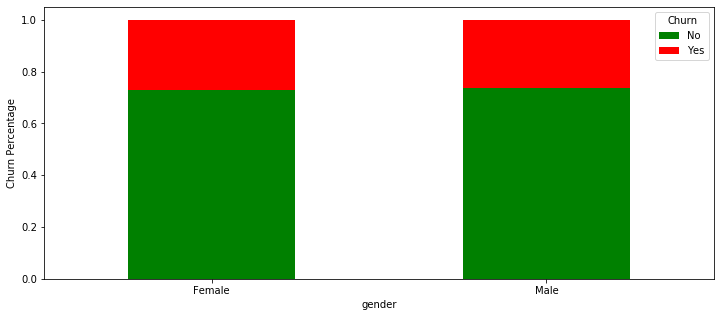

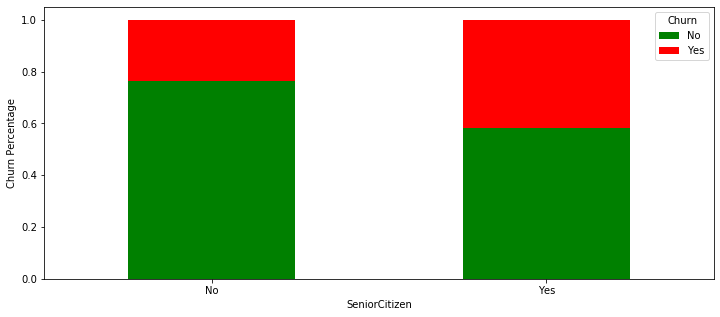

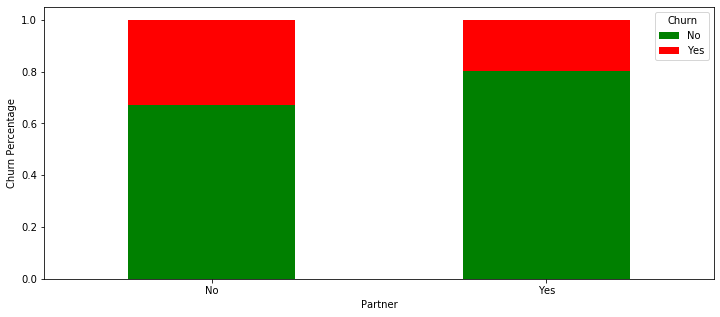

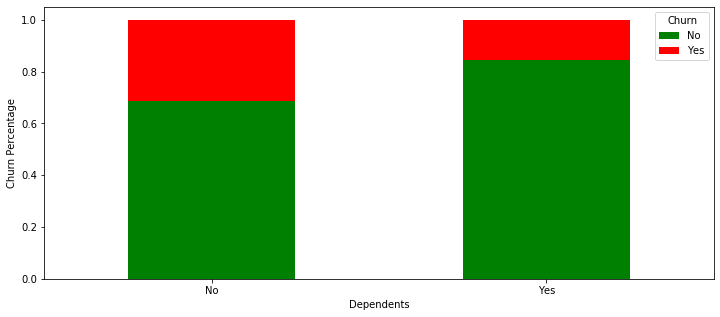

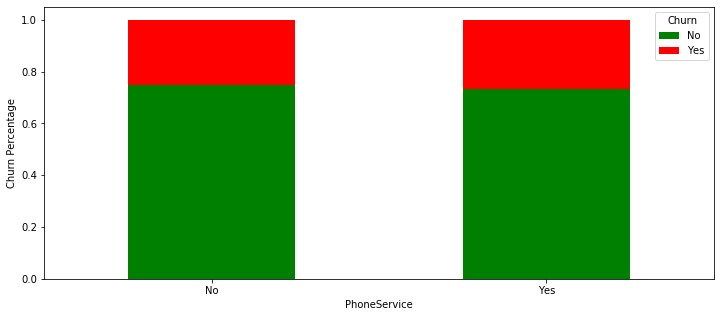

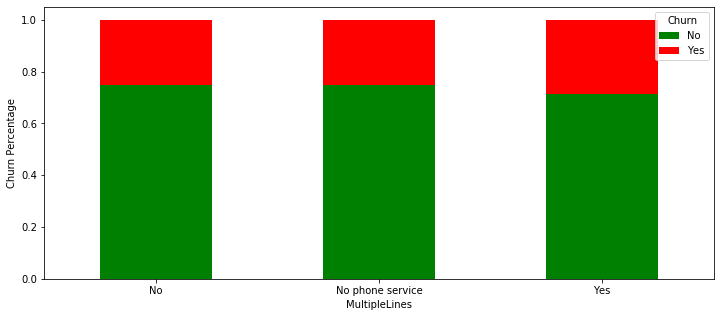

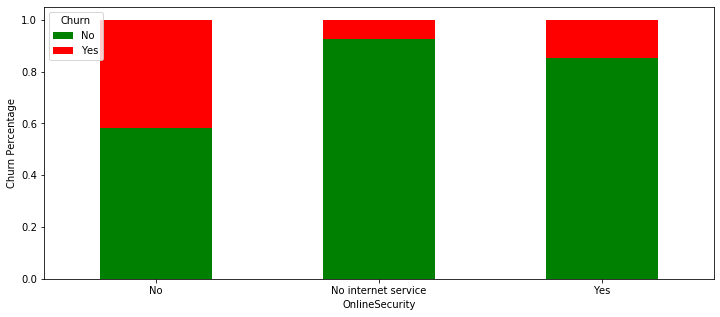

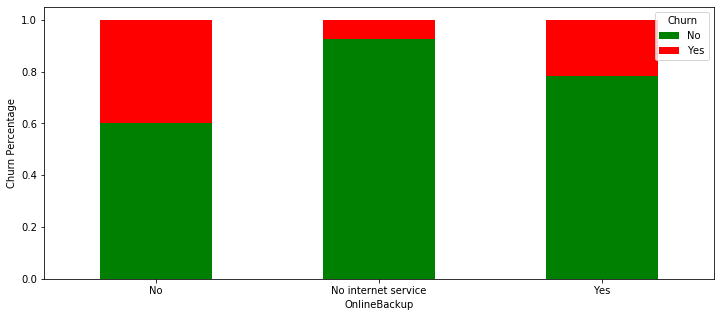

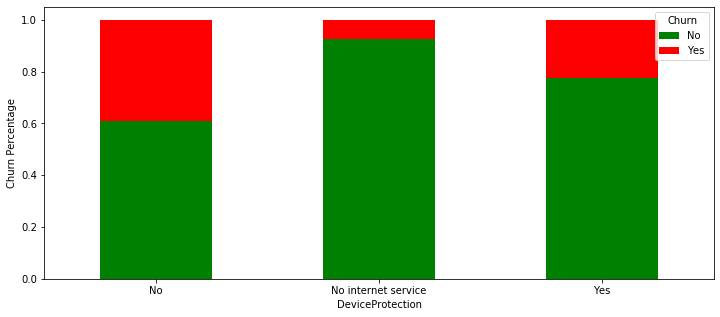

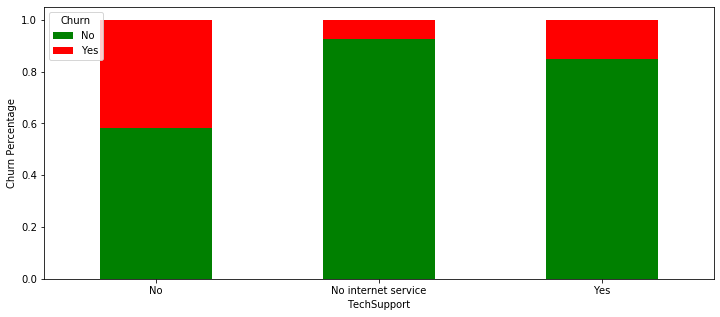

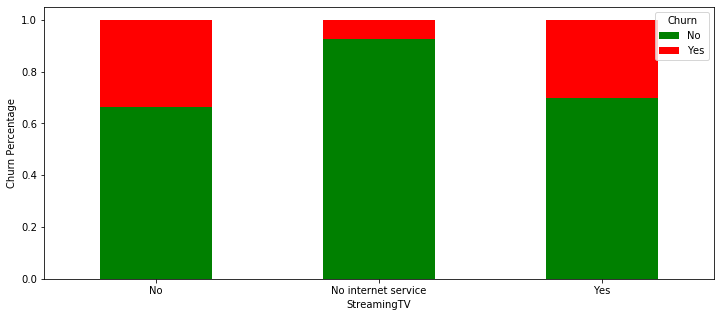

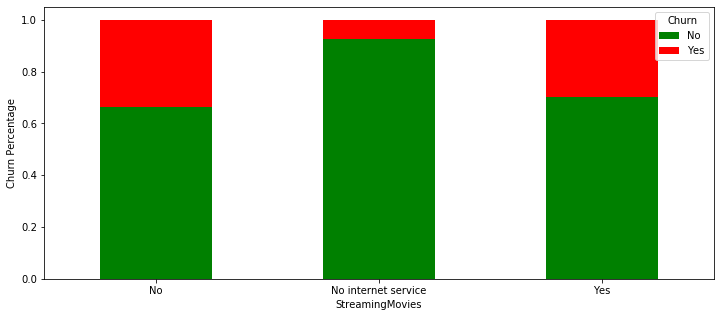

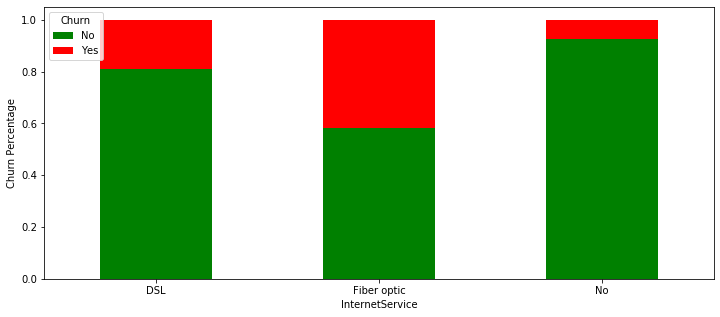

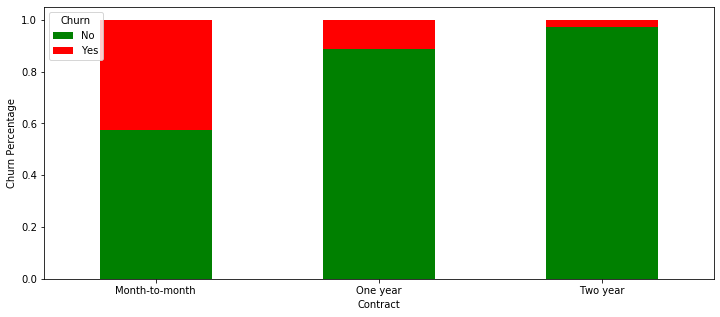

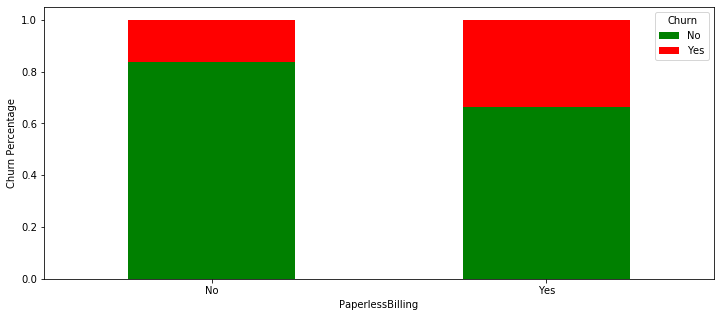

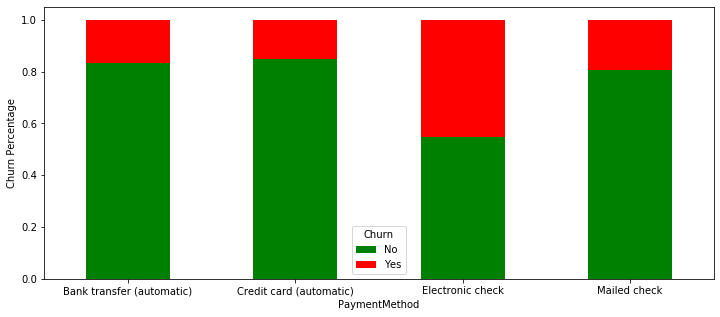

In [16]:
stacked_bar(df_main,"gender", "Churn")
stacked_bar(df_main,"SeniorCitizen","Churn")
stacked_bar(df_main,"Partner","Churn")
stacked_bar(df_main,"Dependents","Churn")
stacked_bar(df_main, "PhoneService", "Churn")
stacked_bar(df_main, "MultipleLines", "Churn")
stacked_bar(df_main, "OnlineSecurity", "Churn")
stacked_bar(df_main, "OnlineBackup", "Churn")
stacked_bar(df_main, "DeviceProtection", "Churn")
stacked_bar(df_main, "TechSupport", "Churn")
stacked_bar(df_main, "StreamingTV", "Churn")
stacked_bar(df_main, "StreamingMovies", "Churn")
stacked_bar(df_main, "InternetService", "Churn")
stacked_bar(df_main, "Contract", "Churn")
stacked_bar(df_main, "PaperlessBilling", "Churn")
stacked_bar(df_main, "PaymentMethod", "Churn")

- Both genders have similar customer churn.
- Young individuals and those with a family or partner are less likely to churn.
- Multiplelines and phoneservice having similar churn rate.So does not help us predict the customer churn.
- Individuals who does not opt for internet service,less likely to churn and that could be because of the less cost of the service.If they have internet service and does not opt for specific service their probability of churning is high.
-  Fiber Optic internet service, more likely to churn.It might be because of the high cost of it.
- Month-to-month contract churn rate is very high.
- Individuals with paperless billing tend to churn more.
- Individuals with Electronic check payment method have higher churn rate

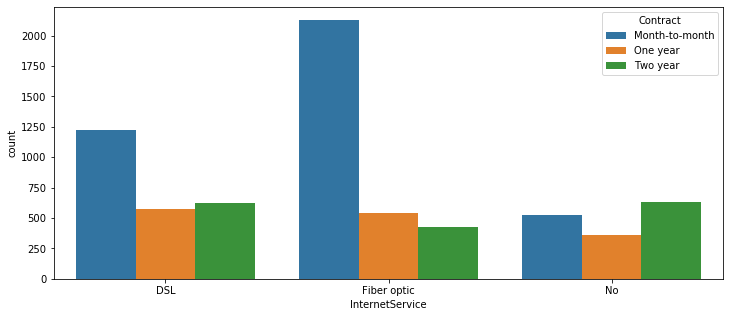

In [17]:
plt.subplots(figsize = (12,5))
sns.countplot(df_main.InternetService, hue = df_main.Contract)

- Many people who opt for month-to-month Contract choose Fiber optic as Internet service which lead to higher churn rate for fiber optic Internet service type.

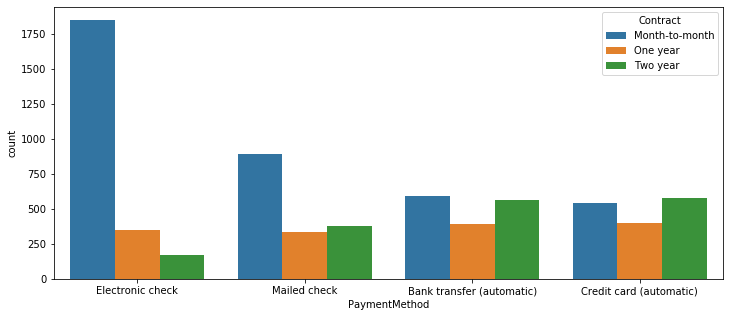

In [18]:
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(df_main.PaymentMethod, hue = df_main.Contract, ax = ax)

- Individuals with month-to-month contract prefer paying by Electronic Check mostly or mailed check and that might be because of short subscription cancellation process compared to automatic payment.

In [19]:
def tenure(t):
    if t<=10:
        return 1
    elif t>10 and t<=20:
        return 2
    elif t>20 and t<=30:
        return 3
    elif t>30 and t<=40:
        return 4
    elif t>40 and t<=50:
        return 5
    elif t>50 and t<=60:
        return 6       
    else:
        return 7
df_main["Tenure_Group"]=df_main["tenure"].apply(lambda x: tenure(x))

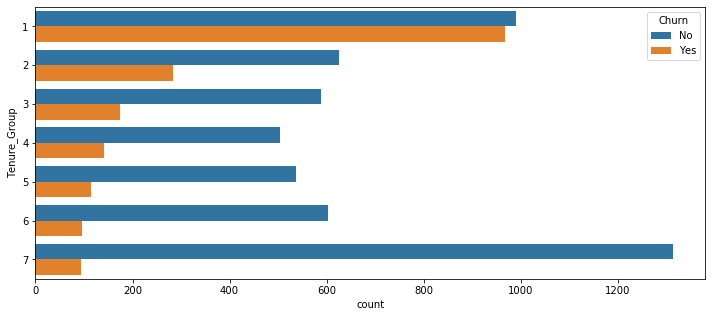

In [20]:
plt.figure(figsize= (12,5))
sns.countplot(y="Tenure_Group", hue="Churn", data=df_main)

Higher the tenure, the lower the churn rate.Individuals with tenure greater than 60 years have significantly lower churn rate than those with less than 10 years tenure.


In [21]:
df_main.drop(["Tenure_Group"], inplace = True, axis = 1)

### **Monthly Charges**

Text(0.5, 1.0, 'Distribution of Monthly Charges by Churn')

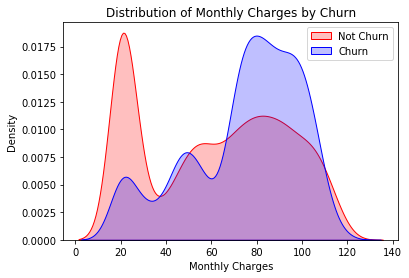

In [22]:
ax = sns.kdeplot(df_main.MonthlyCharges[(df_main["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df_main.MonthlyCharges[(df_main["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of Monthly Charges by Churn')

- Customers with higher monthly charges are more likely to churn


### **Total Charges**

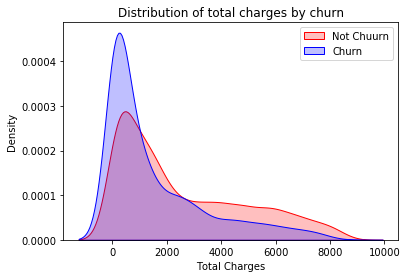

In [23]:
ax = sns.kdeplot(df_main.TotalCharges[(df_main["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df_main.TotalCharges[(df_main["Churn"] == 'Yes') ],
                ax =ax, color="blue", shade= True);
ax.legend(["Not Chuurn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

- As many customers tend to cancel their subsription in 1-2 months,the distribution of total charges for churning customers are high around 0.

### **Security Service, Streaming TV Service, Streaming Movies Service, Device Protection Service, Internet Service**


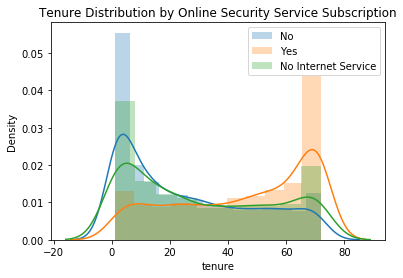

In [24]:
sns.distplot(df_main.tenure[df_main.OnlineSecurity == "No"],
                      hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df_main.tenure[df_main.OnlineSecurity == "Yes"],
                      hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(df_main.tenure[df_main.OnlineSecurity =="No internet service"],
                     hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Online Security Service Subscription")
plt.legend()
plt.show()

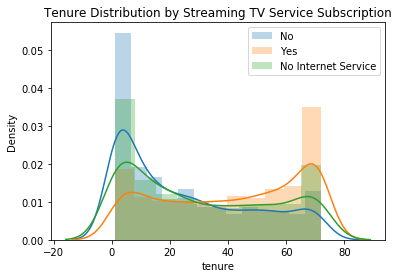

In [25]:
sns.distplot(df_main.tenure[df_main.StreamingTV == "No"],
                   hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df_main.tenure[df_main.StreamingTV == "Yes"],
                  hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(df_main.tenure[df_main.StreamingTV == "No internet service"],
            hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Streaming TV Service Subscription")
plt.legend()
plt.show()

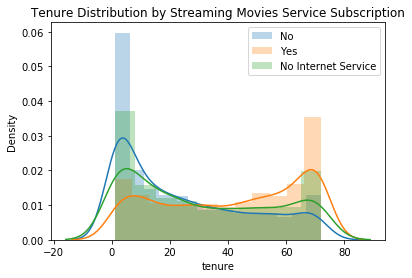

In [26]:
sns.distplot(df_main.tenure[df_main.StreamingMovies == "No"],
                        hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df_main.tenure[df_main.StreamingMovies == "Yes"], 
                       hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(df_main.tenure[df_main.StreamingMovies == "No internet service"],
                       hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Streaming Movies Service Subscription")
plt.legend()
plt.show()

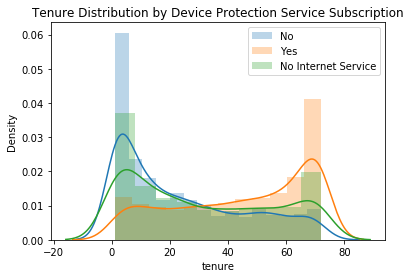

In [27]:
sns.distplot(df_main.tenure[df_main.DeviceProtection == "No"],
                        hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df_main.tenure[df_main.DeviceProtection == "Yes"],
                        hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(df_main.tenure[df_main.DeviceProtection== "No internet service"],
                       hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Device Protection Service Subscription")
plt.legend()
plt.show()

- New customers do not opt for various services and they have high churning rate.



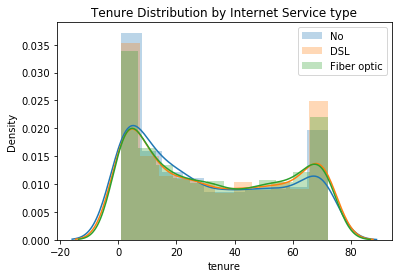

In [28]:
sns.distplot(df_main.tenure[df_main.InternetService == "No"],
                        hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df_main.tenure[df_main.InternetService == "DSL"],
                      hist_kws=dict(alpha=0.3), label="DSL")
sns.distplot(df_main.tenure[df_main.InternetService == "Fiber optic"],
                       hist_kws=dict(alpha=0.3), label="Fiber optic")
plt.title("Tenure Distribution by Internet Service type")
plt.legend()
plt.show()

-Tenure distribution of customers with different internet service is similar



# **Customer Churn Prediction**

In [29]:
# Encode categorical columns 
def encode_data(dataframe):
    if dataframe.dtype == "object":
        dataframe = LabelEncoder().fit_transform(dataframe)
    return dataframe
data = df_main.apply(lambda x: encode_data(x))
data.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,customerID
0,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,1
1,0,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,2
2,1,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,3
3,0,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,4
4,1,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,5


In [30]:
# Train/Test split to create a model for customer churn prediction 
X = data.drop(columns = "Churn")
y = data["Churn"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                    random_state = 4, stratify =y)

In [35]:
# Scale the numeric columns
scaler = StandardScaler()
col = ["tenure", 'MonthlyCharges', 'TotalCharges']
X_train[col] = StandardScaler().fit_transform(X_train[col])
X_test[col] = StandardScaler().fit_transform(X_test[col])

In [36]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear',
                                   random_state = 0, class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5,
                       metric = 'minkowski', p = 2)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100,
                                criterion = 'entropy', random_state = 0)))

In [37]:
# Evaluating the model Results
acc_results =[]
auc_results =[]
names = []
result_col = ["Algorithm", "ROC AUC Mean", "Accuracy Mean"]
model_results = pd.DataFrame(columns = result_col)
i=0
# K- fold cross validation
for name, model in models:
    names.append(name)
    kfold = model_selection.KFold(n_splits=5, random_state=None)
    
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, 
                    cv = kfold, scoring="accuracy")
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train,
                    cv = kfold, scoring="roc_auc")
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)   
    model_results.loc[i] = [name, 
                           round(cv_auc_results.mean()*100,2),
                           round(cv_acc_results.mean()*100,2)]
    i+=1
model_results.sort_values(by = ['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,Accuracy Mean
0,Logistic Regression,84.33,74.48
1,SVC,82.81,79.26
4,Random Forest,82.59,78.65
2,Kernel SVM,79.65,79.22
3,KNN,76.55,75.56


### **KNN parameter optimisation**

In [38]:
# Selecting optimal number of K neighbors 
score = []
for each in range(1,30):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
    knn_loop.fit(X_train,y_train)
    score.append(knn_loop.score(X_test,y_test))

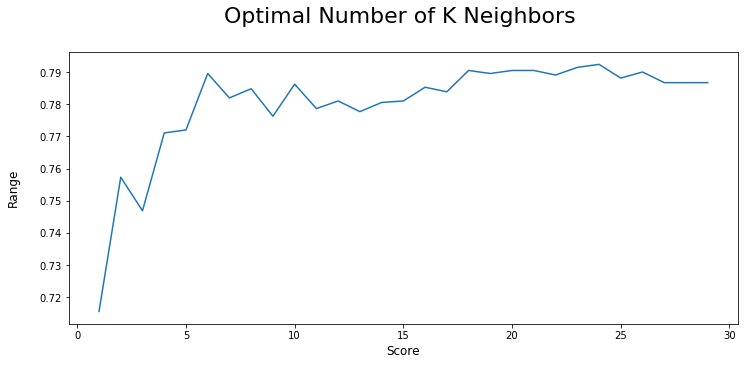

In [39]:
fig = plt.figure(figsize=(12, 5))
plt.plot(range(1,30),score)
plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", 
                         fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", 
                         fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',horizontalalignment="center",
           fontstyle = "normal",fontsize = "22", fontfamily = "sans-serif")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

### **Random Forest Hyperparameter Tuning**

In [40]:
# Number of trees in forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]

# Number of features to consider at every split
max_features = ['log2','sqrt', 'auto']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 70, num = 10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5 ]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4 ]

# Method of selecting samples for training each tree
bootstrap = [ False, True]

criterion = ['entropy','gini']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion' : criterion}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = 
                               random_grid, cv = 5,
                              n_iter = 100, random_state = 42, n_jobs = -1)       
rf_random.fit(X_train,y_train)
scores = cross_val_score(rf_random,X_train,y_train,
                         cv =5)
print("Average 5-Fold CV Score: {}".format(np.mean(scores))) # Calculate average of all the different experiments in cross validation 
print (rf_random.best_params_)

Average 5-Fold CV Score: 0.7935784738558046
{'n_estimators': 56, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'entropy', 'bootstrap': True}


### **Second Iteration**

In [41]:
# Model evaluation on the test set
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results = pd.DataFrame([[model_name, acc, prec, rec, f1]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore"])
    results = results.sort_values(["Precision", "Recall"], ascending = False)
    return results

In [42]:
# Logistic regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#SVC
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)
#knn
classifier3 = KNeighborsClassifier(n_neighbors=22, metric="minkowski", p=2)
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)
#Random Forest
classifier4 = RandomForestClassifier(n_estimators= 56, min_samples_split= 2,
                            min_samples_leaf= 1, max_features= 'log2',
                            max_depth= 8, bootstrap= True,
                            criterion = 'entropy')
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)

In [43]:
lr = model_evaluation(y_test, y_pred, "Logistic Regression")
svm = model_evaluation(y_test, y_pred2, "SVM (Linear)")
knn = model_evaluation(y_test, y_pred3, "K-Nearest Neighbours")
rf = model_evaluation(y_test, y_pred4, "Random Forest")

In [44]:
eval_ =lr.append(svm).append(knn).append(rf).sort_values(["Accuracy","F1 SCore"],
            ascending = False).reset_index().drop(columns = "index")
eval_

,Model,Accuracy,Precision,Recall,F1 SCore
0,Random Forest,0.808057,0.688406,0.508021,0.584615
1,Logistic Regression,0.805687,0.658281,0.559715,0.605010
2,K-Nearest Neighbours,0.789100,0.628889,0.504456,0.559842
3,SVM (Linear),0.788626,0.628635,0.500891,0.557540


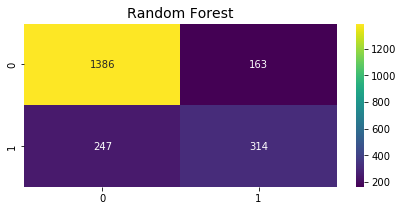

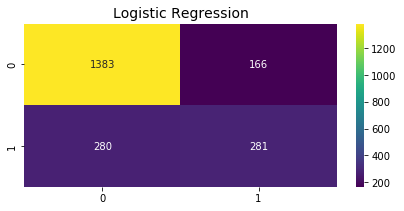

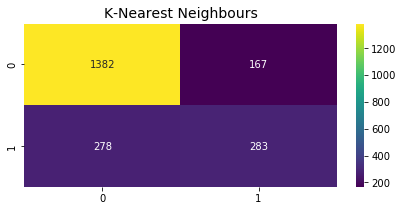

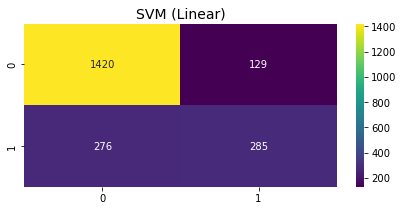

In [45]:
# Confusion matrix plot 
predictions = [y_pred, y_pred2 , y_pred3, y_pred4]
for i, j in zip(predictions, eval_.Model.values):
    plt.figure(figsize=(7,3))
    sns.heatmap(confusion_matrix(y_test, i),
                 annot=True, cmap="viridis" ,fmt='g')
    ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
    plt.title(j,fontsize=14)
    plt.show()

In [46]:
# Training set evalution with k-fold Cross_Validation
def k_fold_cross_validation(classifier_name, name):
    accuracies = cross_val_score(estimator=classifier_name,
                            X = X_train, y = y_train, cv = 5)
    print(name, "accuracy: %0.2f"  % (accuracies.mean()))

In [47]:
k_fold_cross_validation(classifier, "Logistic regression")
k_fold_cross_validation(classifier, "SVM (Linear)")
k_fold_cross_validation(classifier, "K-Nearest Neighbours")
k_fold_cross_validation(classifier, "Random Forest")

Logistic regression accuracy: 0.80
SVM (Linear) accuracy: 0.80
K-Nearest Neighbours accuracy: 0.80
Random Forest accuracy: 0.80


In [70]:
# Probabilities along with classification in LogisticRegression
classifier5 = LogisticRegression(random_state=0)
classifier5.fit(X_train, y_train)
y_pred_prob = classifier5.predict_proba(X_test)
y_pred_prob  = y_pred_prob [:, 1]
y_pred_prob

array([0.1546837 , 0.46044857, 0.20561306, ..., 0.02509559, 0.00769446,
       0.62124074])

In [71]:
# Merge the probabilities result with the original dataset 
y_hats_df = pd.DataFrame(data = y_pred_prob,columns = ['probability'],index = X_test.index.copy())
df_out = pd.merge(df_main, y_hats_df,how='left', left_index = True, right_index = True)
remove_empty= df_out.dropna(how = 'any') 
remove_empty

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,customerID,probability
0,No,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1,0.552353
2,Yes,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,3,0.314258
9,No,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,10,0.012882
10,No,Male,No,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,11,0.226979
13,Yes,Male,No,No,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,14,0.411944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,No,Male,No,No,No,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Electronic check,104.95,7544.30,7023,0.181980
7024,No,Male,No,Yes,No,44,Yes,Yes,Fiber optic,Yes,...,No,No,No,Month-to-month,Yes,Credit card (automatic),84.80,3626.35,7025,0.242389
7031,No,Male,Yes,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,7032,0.031539
7035,No,Male,No,No,No,19,Yes,No,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,7036,0.548355


- Its always a good practice to build a propensity score besides an absolute predicted outcome. Instead of just retrieving a binary estimated target outcome (0 or 1), every ‘Customer ID’ could get an additional layer of propensity score highlighting their percentage of probability to take the target action.

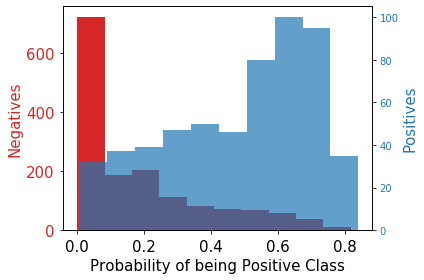

In [72]:
# Visualize churn and not churn probability results to see how many of the data were overlapped between to groups
fig, ax = plt.subplots()
color = 'tab:red'
plt.hist(y_pred_prob[y_test == 0],  color=color)
ax.set_xlabel('Probability of being Positive Class', fontsize=15)
ax.set_ylabel('Negatives', fontsize=15, color=color)
ax.tick_params(axis='both', labelsize=15, pad=5)
ax.tick_params(axis='y', labelcolor=color)
ax2 = ax.twinx()
color = 'tab:blue'
plt.hist(y_pred_prob[y_test==1], alpha=0.7,color=color)
ax2.set_ylabel('Positives', fontsize=15, color=color)
ax2.tick_params(axis='y',labelcolor=color)
fig.tight_layout()
plt.show() 

In [ ]:
remove_empty['predictions'] = y_pred
remove_empty["propensity_to_churn(%)"] = y_pred_prob
remove_empty["propensity_to_churn(%)"] = remove_empty["propensity_to_churn(%)"]*100
remove_empty["propensity_to_churn(%)"]= remove_empty["propensity_to_churn(%)"].round(2)
final_results = remove_empty[['customerID', 'Churn','predictions', 'propensity_to_churn(%)']]
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
#print (final_results)

In [110]:
# high-risk (for customers with propensity score > 80%)
filter_highrisk = final_results[(final_results['propensity_to_churn(%)'] > 80)]
filter_highrisk

,customerID,Churn,predictions,propensity_to_churn(%),Ranking
3748,3749,No,1,83.57,1
3841,3842,Yes,1,81.05,1
5215,5216,Yes,1,83.97,1
5357,5358,No,1,83.14,1
5618,5619,No,1,83.83,1
6611,6612,No,1,81.68,1
6826,6827,No,1,80.34,1
6835,6836,No,1,80.59,1


In [109]:
# medium-risk (for customers with a propensity score between 60–80%)
filter_mediumrisk = final_results[(final_results['propensity_to_churn(%)'].between(60,80))]
filter_mediumrisk

,customerID,Churn,predictions,propensity_to_churn(%),Ranking
119,120,No,1,66.34,1
126,127,Yes,1,74.71,1
171,172,Yes,1,62.16,2
184,185,Yes,1,68.47,1
190,191,No,1,60.34,2
...,...,...,...,...,...
6984,6985,No,1,64.09,2
6988,6989,No,1,60.33,2
7001,7002,Yes,1,66.55,1
7009,7010,Yes,1,74.72,1


In [111]:
# low-risk category (for customers with propensity score < 60%)
filter_lowrisk = final_results[(final_results['propensity_to_churn(%)'] < 60)]
filter_lowrisk

,customerID,Churn,predictions,propensity_to_churn(%),Ranking
0,1,No,0,15.47,6
2,3,Yes,0,46.04,3
9,10,No,0,20.56,5
10,11,No,1,56.53,2
13,14,Yes,0,21.59,5
...,...,...,...,...,...
7020,7021,No,0,12.34,6
7022,7023,No,0,8.47,7
7024,7025,No,0,22.48,5
7031,7032,No,0,2.51,9


- Classified the upcoming customers based on the propensity score as high risk (for customers with propensity score > 80%), medium risk (for customers with a propensity score between 60–80%) and lastly low-risk category (for customers with propensity score <60%).To Focus on each segment of customers upfront and ensure that there needs are well taken care of.


- For the modelling, I used ensemble method such as Random Forest as well as Logistic Regression,k-means clustering and Support Vector Machine.As I built a model on 70% of data and validated model on remaining 30% of data.The Random Forest model has many hyperparameters and I tuned them using Grid Search Cross Validation while making sure that I do not overfit.I also tuned number of K neighbors in KNN to select the optimal number of clusters for better performance.

- After all hyperparameters optimisation the best final model on the test set is Logistic Regression that resulted in 0.60 F1 score and 0.80 Accuracy.

- The performance of the model on test data is close to training data.So, we can conclude that there is no overfitting and underfitting.

- I also tried to predict churn probabilities along with classification in Logistic Regression and as we can see in the above graph there are some data that were churn data but predicted with positive probability and visa versa.I personally believe it's better to predict probability rather than a simple binary classification(0,1),its more accurate and makes it easier to apply further analysis.As an example, Amazon use Star rating method rather than a simple bad or good rating method and calculates a product's star rating using machine-learned models instead of a simple average. 


# **Predicting Feature Importance**

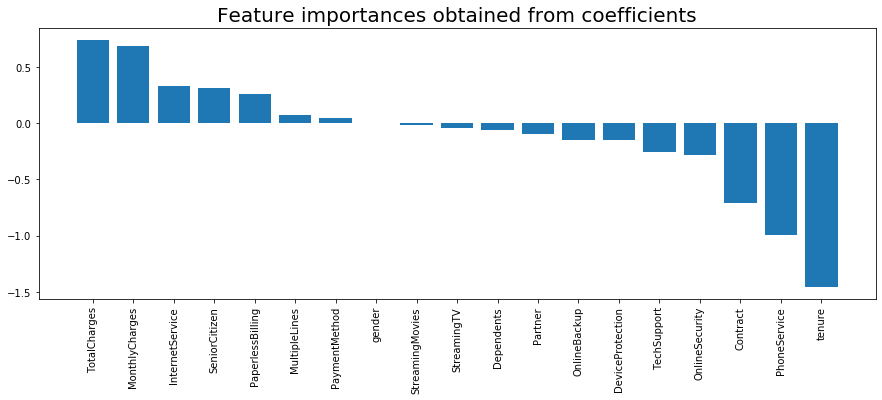

In [83]:
plt.figure(figsize=(15,5))
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': classifier.coef_[0]})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

- From the feature importance plot, we can see which features govern the customer churn.



# **Customer Survivel Analysis**

In [84]:
# Data preperation 
df_main.Churn = labelencoder.fit_transform(df_main.Churn)
eventvar = df_main['Churn']
timevar = df_main['tenure']

In [85]:
# Create dummy variables for all categorical variables.
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
               'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod']
survivaldata = pd.get_dummies(df_main, columns = categorical, drop_first= True)
# Drop variables such as tenure and Churn as they are not needed in survival data
survivaldata.drop(['tenure', 'Churn'], axis = 1, inplace= True)
survivaldata = st.add_constant(survivaldata, prepend=False)
survivaldata.head()

,MonthlyCharges,TotalCharges,customerID,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,const
0,29.85,29.85,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1.0
1,56.95,1889.50,2,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1.0
2,53.85,108.15,3,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1.0
3,42.30,1840.75,4,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1.0
4,70.70,151.65,5,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1.0


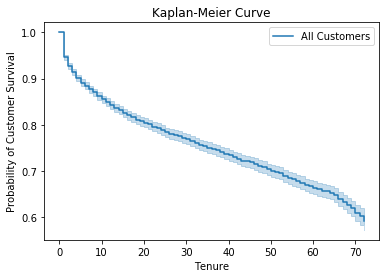

In [86]:
# Create a KaplanMeier object
kmf = KaplanMeierFitter()
# Calculate the K-M curve for all groups
kmf.fit(timevar,event_observed = eventvar,label = "All Customers")
# Plot the curve and assign labels
kmf.plot()
plt.ylabel('Probability of Customer Survival')
plt.xlabel('Tenure')
plt.title('Kaplan-Meier Curve');

- Churn is relatively low for telcom. The company retain more than 60% of its customers even after 72 months.
- There is a constant decrease in survival probability between 3-60 months.
- After 60 months or 5 years, survival probability decreases with a higher rate.

###  Internet service, phone service, online backup, online security, device protection, tech support, streaming Tv and streaming movies

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           3.04 0.22      2.19

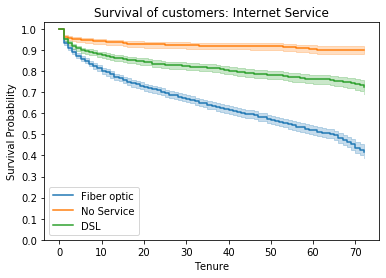

In [87]:
Fiber_optic = (survivaldata['InternetService_Fiber optic'] == 1)
No_Service = (survivaldata['InternetService_No'] == 1)
DSL = ((survivaldata['InternetService_Fiber optic'] == 0)
        & (survivaldata['InternetService_No'] == 0))
plt.figure()
ax = plt.subplot(1,1,1)
kmf.fit(timevar[Fiber_optic],event_observed = eventvar[Fiber_optic],
        label = "Fiber optic")
plot1 = kmf.plot(ax = ax)
kmf.fit(timevar[No_Service],event_observed = eventvar[No_Service],
        label = "No Service")
plot2 = kmf.plot(ax = plot1)
kmf.fit(timevar[DSL],event_observed = eventvar[DSL],label = "DSL")
plot3 = kmf.plot(ax = plot2)                
plt.title('Survival of customers: Internet Service')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'],
                       df['InternetService'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

 - The company should target customers who opt for internet service as their survival probability constantly descreases. Also, Fiber Optic type of Internet Service is costly and fast compared to DSL and this might be the reason of higher customer churning.

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         336.63 <0.005    242.82

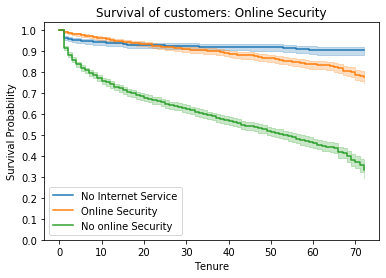

In [88]:
no_internetService = (survivaldata['OnlineSecurity_No internet service'] == 1)
onlineSecurity = (survivaldata['OnlineSecurity_Yes'] == 1)
no_onlineSecurity = ((survivaldata['OnlineSecurity_No internet service'] == 0) 
                     & (survivaldata['OnlineSecurity_Yes'] == 0))
plt.figure()
ax = plt.subplot(1,1,1)
kmf.fit(timevar[no_internetService],event_observed =
        eventvar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)
kmf.fit(timevar[onlineSecurity],event_observed = eventvar[onlineSecurity],
        label = "Online Security")
plot2 = kmf.plot(ax = plot1)
kmf.fit(timevar[no_onlineSecurity],event_observed = eventvar[no_onlineSecurity],
        label = "No online Security")
plot3 = kmf.plot(ax = plot2)                 
plt.title('Survival of customers: Online Security')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'],
                      df['OnlineSecurity'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.43 0.51      0.97

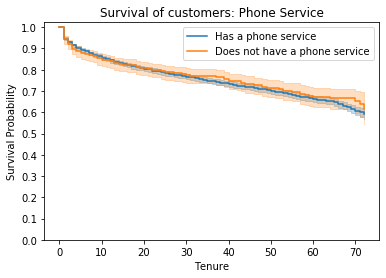

In [89]:
PhoneService = (survivaldata['PhoneService_Yes'] == 1)
no_PhoneService = (survivaldata['PhoneService_Yes'] == 0)
plt.figure()
ax = plt.subplot(1,1,1)
kmf.fit(timevar[PhoneService],event_observed = eventvar[PhoneService],
        label = "Has a phone service")
plot1 = kmf.plot(ax = ax)
kmf.fit(timevar[no_PhoneService],event_observed = eventvar[no_PhoneService],
        label = "Does not have a phone service")
plot2 = kmf.plot(ax = plot1)               
plt.title('Survival of customers: Phone Service')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[PhoneService], 
         timevar[no_PhoneService], event_observed_A=eventvar[PhoneService], 
         event_observed_B=eventvar[no_PhoneService])
groups.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         299.49 <0.005    216.03

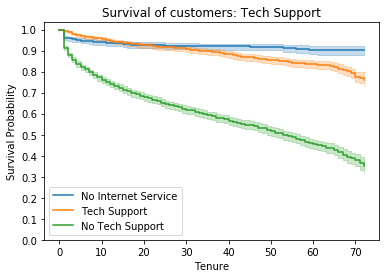

In [90]:
no_internetService = (survivaldata['TechSupport_No internet service'] == 1)
TechSupport = (survivaldata['TechSupport_Yes'] == 1)
no_TechSupport = ((survivaldata['TechSupport_No internet service'] == 0) 
                 &(survivaldata['TechSupport_Yes'] == 0))
plt.figure()
ax = plt.subplot(1,1,1)
kmf.fit(timevar[no_internetService],event_observed = 
        eventvar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)
kmf.fit(timevar[TechSupport],event_observed = eventvar[TechSupport],
        label = "Tech Support")
plot2 = kmf.plot(ax = plot1)
kmf.fit(timevar[no_TechSupport],event_observed = eventvar[no_TechSupport],
        label = "No Tech Support")
plot3 = kmf.plot(ax = plot2)               
plt.title('Survival of customers: Tech Support')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], 
                        df['TechSupport'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         418.92 <0.005    302.19

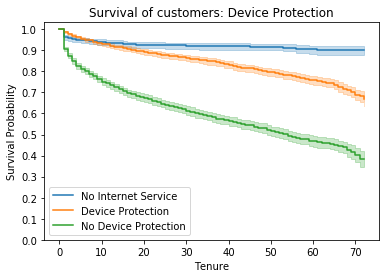

In [91]:
no_internetService = (survivaldata['DeviceProtection_No internet service'] == 1)
DeviceProtection = (survivaldata['DeviceProtection_Yes'] == 1)
no_DeviceProtection = ((survivaldata['DeviceProtection_No internet service'] == 0) 
                       & (survivaldata['DeviceProtection_Yes'] == 0))
plt.figure()
ax = plt.subplot(1,1,1)
kmf.fit(timevar[no_internetService],event_observed = eventvar[no_internetService],
        label = "No Internet Service")
plot1 = kmf.plot(ax = ax)
kmf.fit(timevar[DeviceProtection],event_observed = eventvar[DeviceProtection],
        label = "Device Protection")
plot2 = kmf.plot(ax = plot1)
kmf.fit(timevar[no_DeviceProtection],event_observed = eventvar[no_DeviceProtection],
        label = "No Device Protection")
plot3 = kmf.plot(ax = plot2)               
plt.title('Survival of customers: Device Protection')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], 
                      df['DeviceProtection'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         218.26 <0.005    157.44

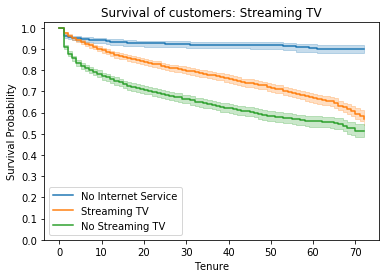

In [92]:
no_internetService = (survivaldata['StreamingTV_No internet service'] == 1)
StreamingTV = (survivaldata['StreamingTV_Yes'] == 1)
no_StreamingTV = ((survivaldata['StreamingTV_No internet service'] == 0) 
                 &(survivaldata['StreamingTV_Yes'] == 0))
plt.figure()
ax = plt.subplot(1,1,1)
kmf.fit(timevar[no_internetService],event_observed = eventvar[no_internetService],
        label = "No Internet Service")
plot1 = kmf.plot(ax = ax)
kmf.fit(timevar[StreamingTV],event_observed = eventvar[StreamingTV],
        label = "Streaming TV")
plot2 = kmf.plot(ax = plot1)
kmf.fit(timevar[no_StreamingTV],event_observed = eventvar[no_StreamingTV],
        label = "No Streaming TV")
plot3 = kmf.plot(ax = plot2)              
plt.title('Survival of customers: Streaming TV')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'],
                        df['StreamingTV'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         219.16 <0.005    158.09

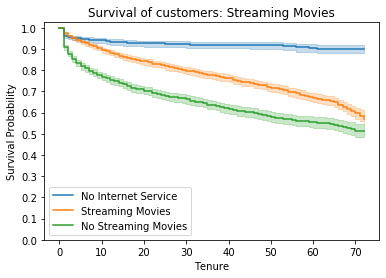

In [93]:
no_internetService = (survivaldata['StreamingMovies_No internet service'] == 1)
StreamingMovies = (survivaldata['StreamingMovies_Yes'] == 1)
no_StreamingMovies = ((survivaldata['StreamingMovies_No internet service'] == 0) 
                     &(survivaldata['StreamingMovies_Yes'] == 0))
plt.figure()
ax = plt.subplot(1,1,1)
kmf.fit(timevar[no_internetService],event_observed = eventvar[no_internetService],
        label = "No Internet Service")
plot1 = kmf.plot(ax = ax)
kmf.fit(timevar[StreamingMovies],event_observed = eventvar[StreamingMovies],
        label = "Streaming Movies")
plot2 = kmf.plot(ax = plot1)
kmf.fit(timevar[no_StreamingMovies],event_observed = eventvar[no_StreamingMovies],
        label = "No Streaming Movies")
plot3 = kmf.plot(ax = plot2)             
plt.title('Survival of customers: Streaming Movies')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'],
                       df['StreamingMovies'],df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         412.06 <0.005    297.24

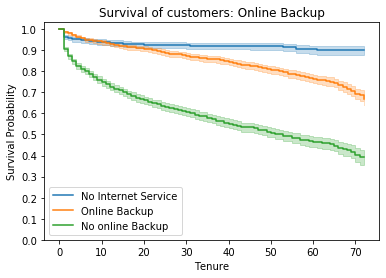

In [94]:
no_internetService = (survivaldata['OnlineBackup_No internet service'] == 1)
onlineBackup = (survivaldata['OnlineBackup_Yes'] == 1)
no_onlineBackup = ((survivaldata['OnlineBackup_No internet service'] == 0) 
                  &(survivaldata['OnlineBackup_Yes'] == 0))
plt.figure()
ax = plt.subplot(1,1,1)
kmf.fit(timevar[no_internetService],event_observed = eventvar[no_internetService],
        label = "No Internet Service")
plot1 = kmf.plot(ax = ax)
kmf.fit(timevar[onlineBackup],event_observed = eventvar[onlineBackup],
        label = "Online Backup")
plot2 = kmf.plot(ax = plot1)
kmf.fit(timevar[no_onlineBackup],event_observed = eventvar[no_onlineBackup],
        label = "No online Backup")
plot3 = kmf.plot(ax = plot2)                
plt.title('Survival of customers: Online Backup')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'],
                        df['OnlineBackup'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

- If customer is not enrolled in services like online backup, online security, device protection, tech support, streaming Tv and streaming movies even though having active internet service, the survival probability is less.

### **Payment Method**

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         551.98 <0.005    393.94

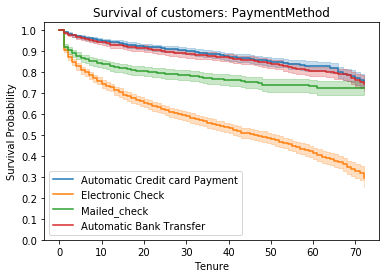

In [95]:
automatic_Credit_Card = (survivaldata['PaymentMethod_Credit card (automatic)'] == 1)
electronic_check = (survivaldata['PaymentMethod_Electronic check'] == 1)
mailed_check = (survivaldata['PaymentMethod_Mailed check'] == 1)
automatic_Bank_Transfer = ((survivaldata['PaymentMethod_Credit card (automatic)'] == 0)
 & (survivaldata['PaymentMethod_Electronic check'] == 0) &
  (survivaldata['PaymentMethod_Mailed check'] == 0))
plt.figure()
ax = plt.subplot(1,1,1)
kmf.fit(timevar[automatic_Credit_Card],event_observed =
        eventvar[automatic_Credit_Card],label = "Automatic Credit card Payment")
plot1 = kmf.plot(ax = ax)
kmf.fit(timevar[electronic_check],event_observed = eventvar[electronic_check],label = "Electronic Check")
plot2 = kmf.plot(ax = plot1)
kmf.fit(timevar[mailed_check],event_observed = eventvar[mailed_check],label = "Mailed_check")
plot3 = kmf.plot(ax = plot2)
kmf.fit(timevar[automatic_Bank_Transfer],event_observed = eventvar[automatic_Bank_Transfer],label = "Automatic Bank Transfer")
plot4 = kmf.plot(ax = plot3)             
plt.title('Survival of customers: PaymentMethod')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'],
                       df['PaymentMethod'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()


- Churn probability is low if customer's paying method is automatic and that could be because a customer has to make an effort to pay and it takes time by electronic check or mailed check.

### **Contract**

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
        1644.41 <0.005       inf

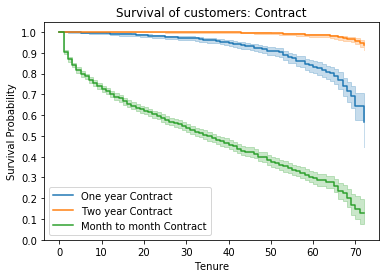

In [96]:
Contract_One_year = (survivaldata['Contract_One year'] == 1)
Contract_Two_year = (survivaldata['Contract_Two year'] == 1)
Contract_month_to_month = ((survivaldata['Contract_One year'] == 0) 
        & (survivaldata['Contract_Two year'] == 0))
plt.figure()
ax = plt.subplot(1,1,1)
kmf.fit(timevar[Contract_One_year],event_observed = eventvar[Contract_One_year],
        label = "One year Contract")
plot1 = kmf.plot(ax = ax)
kmf.fit(timevar[Contract_Two_year],event_observed = eventvar[Contract_Two_year],
        label = "Two year Contract")
plot2 = kmf.plot(ax = plot1)
kmf.fit(timevar[Contract_month_to_month],
event_observed = eventvar[Contract_month_to_month],label = "Month to month Contract")
plot3 = kmf.plot(ax = plot2)               
plt.title('Survival of customers: Contract')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'],
                        df['Contract'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

- Company should target customers to subscribe for long-term service.More  offers should be given to customers who opt for month-to-month contract.
